In [ ]:
"""
Purpose: To check the errors on the validation test set
to get ideas on how to make validation score go up

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd
import datajoint_utils as du

INFO - 2021-04-07 04:31:33,056 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 04:31:33,058 - settings - Setting database.user to celiib
INFO - 2021-04-07 04:31:33,059 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 04:31:33,063 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-07 04:31:33,065 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 04:31:33,078 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-07 04:31:33,509 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 04:31:33,513 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 04:31:33,514 - settings - Setting database.user to celiib
INFO - 2021-04-07 04:31:33,515 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 04:31:33,515 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 04:31:33,516 - settings - Setting database.user to celiib
INFO - 2021-04-07 04:31:33,517 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 04:31:33,519 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 04:31:33,977 - settings - Setting enable_python_native_blobs to True


# Computing the validation statistics (to pick the ones to look at)

In [5]:
du.proofreading_stats_table(validation=True)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,mesh_faces faces indices that were saved off as belonging to proofread neuron (external storage),axon_faces faces indices that were saved off as belonging to proofread neuron's axon (external storage),axon_on_dendrite_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,axon_on_dendrite_merges_error_length the length (in um) of skeleton distance canceled out by filter,low_branch_clusters_error_area the area (in um ^ 2) of the faces canceled out by filter,low_branch_clusters_error_length the length (in um) of skeleton distance canceled out by filter,dendrite_on_axon_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,dendrite_on_axon_merges_error_length the length (in um) of skeleton distance canceled out by filter,double_back_and_width_change_error_area the area (in um ^ 2) of the faces canceled out by filter,double_back_and_width_change_error_length the length (in um) of skeleton distance canceled out by filter,crossovers_error_area the area (in um ^ 2) of the faces canceled out by filter,crossovers_error_length the length (in um) of skeleton distance canceled out by filter,high_degree_coordinates_error_area the area (in um ^ 2) of the faces canceled out by filter,high_degree_coordinates_error_length the length (in um) of skeleton distance canceled out by filter,n_valid_syn_presyn_for_split,n_valid_syn_postsyn_for_split,n_presyn_error_syn_non_axon,presyn_error_syn_non_axon_ids the ids of the synapses that were errored out,n_presyn_error_syn,n_postsyn_error_syn,total_error_synapses,total_presyns,total_postsyns,total_synapses,perc_error_presyn,perc_error_postsyn,overall_percent_error
864691135113167769,0,0.25,30.00,5,0,0,3,=BLOB=,=BLOB=,594.89,535.07,0.0,0.0,0.0,0.0,0.0,0.0,736.23,1014.68,0.0,0.0,32,2224,29,=BLOB=,175,31,206,207,2255,2462,0.8454,0.0137,0.0837
864691135212632448,0,0.25,30.00,5,0,0,3,=BLOB=,=BLOB=,1470.86,1470.71,0.0,0.0,0.0,0.0,73.85,85.33,721.37,846.32,0.0,0.0,40,3319,28,=BLOB=,373,40,413,413,3359,3772,0.9031,0.0119,0.1095
864691135212690816,0,0.25,30.00,5,0,0,3,=BLOB=,=BLOB=,493.5,646.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2334,17,=BLOB=,47,2,49,47,2336,2383,1.0,0.0009,0.0206
864691135233108569,0,0.25,30.00,5,0,0,3,=BLOB=,=BLOB=,32.62,32.43,0.0,0.0,0.0,0.0,0.0,0.0,451.36,559.06,0.0,0.0,11,725,3,=BLOB=,48,8,56,59,733,792,0.8136,0.0109,0.0707
864691135272164113,0,0.25,30.00,5,0,0,3,=BLOB=,=BLOB=,304.86,296.4,0.0,0.0,0.0,0.0,0.0,0.0,361.91,434.12,0.0,0.0,31,5650,30,=BLOB=,183,15,198,214,5665,5879,0.8551,0.0026,0.0337
864691135348272855,0,0.25,30.00,5,0,0,3,=BLOB=,=BLOB=,1985.0,2325.09,15.29,14.75,0.0,0.0,4.14,6.82,86.6,108.43,0.0,0.0,66,6018,16,=BLOB=,385,5,390,451,6023,6474,0.8537,0.0008,0.0602
864691135382947307,0,0.25,30.00,5,0,0,3,=BLOB=,=BLOB=,362.58,477.62,0.0,0.0,0.0,0.0,12.34,5.74,61.7,91.29,0.0,0.0,54,2631,9,=BLOB=,29,3,32,83,2634,2717,0.3494,0.0011,0.0118
864691135393964789,0,0.25,30.00,5,0,0,3,=BLOB=,=BLOB=,586.91,441.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1528,21,=BLOB=,212,171,383,215,1699,1914,0.986,0.1006,0.2001
864691135407289801,0,0.25,30.00,5,0,0,3,=BLOB=,=BLOB=,1548.19,1817.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3329,12,=BLOB=,277,5,282,277,3334,3611,1.0,0.0015,0.0781
864691135491233631,0,0.25,30.00,5,0,0,3,=BLOB=,=BLOB=,341.95,371.9,0.0,0.0,0.0,0.0,0.0,0.0,584.3,747.2,0.0,0.0,13,753,13,=BLOB=,153,4,157,166,757,923,0.9217,0.0053,0.1701


In [38]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")
segment_id = segment_ids[26]
proofread_segment_id = segment_id
print(f"Segment_id = {segment_id}")

Segment_id = 864691135748575017


Synapsse Results:
Total Number of Synapses = 4803
n_valid_syn_ids_presyn = 2
n_errored_syn_ids_presyn = 226
n_valid_syn_ids_postsyn = 4524
n_errored_syn_ids_postsyn = 51


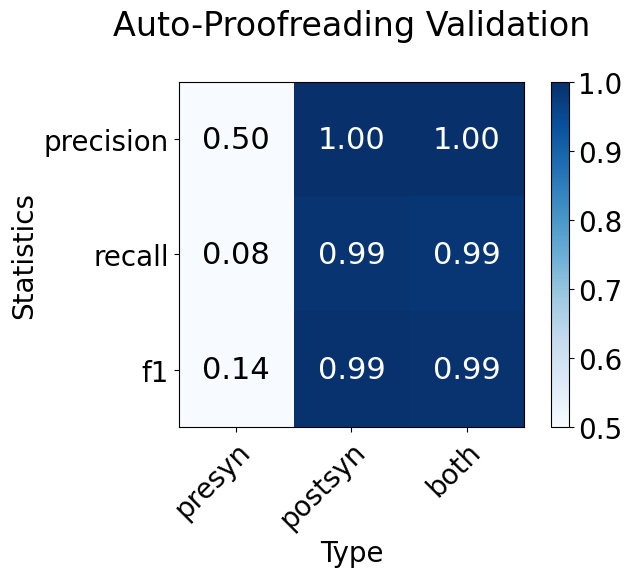

In [39]:
curr_validation_df = vu.synapse_validation_df_single_neuron(segment_id)
vu.synapse_validation_df_to_score_plot(curr_validation_df)

In [40]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 1


In [41]:
neuron_obj = neuron_objs[0]

In [51]:
neuron_obj.segment_id

864691135748575017

In [42]:
neuron_obj_with_web = au.complete_axon_processing(neuron_obj,
                                                 verbose=True)


Part 1: Axon like branchese 
{'L1': array([11]), 'L2': array([10, 11]), 'L5': array([ 0,  3,  4,  6, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 28,
       29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41])}
Limb L0 soma angle: 108.15 
Limb L1 soma angle: 13.98 
Limb L2 soma angle: 129.94 
Limb L3 soma angle: 51.58 
Limb L4 soma angle: 78.11 
Limb L5 soma angle: 157.51 

Part 2: possible_axon_limbs = [0, 2, 4, 5]

Phase 2: Working on Limb L0
nodes_to_eliminate = [1]

Phase 2: Working on Limb L2
nodes_to_eliminate = [7 8]

Phase 2: Working on Limb L4
nodes_to_eliminate = [4]

Phase 2: Working on Limb L5
nodes_to_eliminate = [7 8]

----Working on Limb L0-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L2-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L4-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L5-----
No endpoints were eliminated so do

base_final_widths = [167.477567   188.03630744 227.30013246]
overall_ais_width = 207.82222572428898
ais_width = 194.2713356329035
Adding the following branches as true axons: [ 3  6 38 39 41 40 12 13 14 15 16 17 18 19 20 24 25]
curr_soma_angle = 157.51
max_axon_angle = 158.03407962486338
Changing to a better axon candidate


 --- Working on limb 5, candidate # 1
1 out of 5 branches are axons
Axon percentage = 0.2
curr_axon_angle_threshold = 120
candidate_nodes = [1 2 4 5 7 8 9]
non_axon_branches_on_subgraph = [1 2 5 7 8 9]
endnodes_to_test = []
candidate_angles,restr_skels = (None, None)
Not adding candidate because no angles (None) passed the threhold 120 


 --- Working on limb 5, candidate # 2
0 out of 1 branches are axons
Axon percentage = 0.0
Not adding candidate no axon branches detected 


 --- Working on limb 5, candidate # 3
11 out of 17 branches are axons
Axon percentage = 0.6470588235294118
curr_axon_angle_threshold = 120
candidate_nodes = [ 0  7  8 11 21 22 23 26 27 28 29 3

  0%|          | 0/1 [00:00<?, ?it/s]

root_curr = [725802.6 586360.4 885110.3]
Time for preparing soma vertices and root: 0.0006244182586669922
invalidation_d = 2000
cc_vertex_thresh = 10


  0%|          | 0/57920 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.0672307014465332
connecting at the root
branches_touching_root = [42]
combining close nodes
combine_threshold = 1300
length of Graph = 10433
After combining close endpoints max(kept_branches_idx) = 42, len(kept_branches_idx) = 43
empty_indices % = 0.0
 conflict_indices % = 0.006900910885602466


  0%|          | 0/21 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/43 [00:00<?, ?it/s]

Decomposing first pass: 5.496382474899292
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 0.00012421607971191406
Total time for MAP sublimb processing 5.7220458984375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 0.001207590103149414
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.0751338005065918
sbv[0].reshape(-1,3) = [[725802.6 586360.4 885110.3]]
closest_sk_pt_coord BEFORE = [726500.52304072 586051.8789444  884564.27849289]
current_skeleton.shape = (560, 2, 3)
node_for_stitch = 261: [726500.52304072 586051.8789444  884564.27849289]
node_for_stitch AFTER = 261: [726500.52304072 586051.8789444  884564.27849289]
possible_node_loc = [257 560]
possible_node_loc AFTER = [257 560]
curr_shortest_path = [261, 260.0, 259.0, 257.0]
Current stitch point was not a branch or endpoint, 

  0%|          | 0/4 [00:00<?, ?it/s]

Removed 4 skeletal branches


  0%|          | 0/43 [00:00<?, ?it/s]

115491 115492
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/35 [00:00<?, ?it/s]

Limb Correspondence before stitching = 35
Limb Correspondence AFTER stitching = 35
Readjusting starting axon branch skeleton
Fixing the axon starting branch endpoint to align with upstream branch
Starting Branch 12 skeleton before fix: (560, 2, 3)
Starting Branch 12 skeleton AFTER fix: (561, 2, 3)
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7f627cd86f98>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [726780.08461538 584692.84230769 884368.61923077]---------
Starting_edge inside branches_to_conept = [[726780.08461538 584692.84230769 884368.61923077]
 [726795.23711895 585490.23636776 884148.44873445]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [17]
printing out current edge:
[[726780.08461538 584692.84230769 884368.61923077]
 [726795.23711895 585490.23636776 884148.44873445]]
edge_endpoints_to_process was empty so exiting loop after 60 iterations
sta

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/284 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

# Need way of finding the intersection and webbings of incorrect to correct branching

In [43]:
branch_attr = vu.neuron_to_border_branching_attributes(neuron_obj_with_web,
                                         plot_valid_border_branches=False,
                                          plot_invalid_border_branches = False,
                                          verbose=False
                                         )


Synapsse Results:
Total Number of Synapses = 4803
n_valid_syn_ids_presyn = 2
n_errored_syn_ids_presyn = 226
n_valid_syn_ids_postsyn = 4524
n_errored_syn_ids_postsyn = 51
Synapsse Results:
Total Number of Synapses = 4803
n_valid_syn_ids_presyn = 2
n_errored_syn_ids_presyn = 226
n_valid_syn_ids_postsyn = 4524
n_errored_syn_ids_postsyn = 51


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [50]:
branch_attr[0]

{'web_size_faces': 134,
 'web_size_volume': 196149084.61931258,
 'web_size_skeleton': 1866.0059000128263,
 'web_size_ray_trace_percentile': 272.8679244230306,
 'web_bbox_ratios_max': 3.318545242206583,
 'web_bbox_ratios_min': 1.191484494195247,
 'web_volume_ratio': 2.484161397079591,
 'web_cdf': 0.653768,
 'parent_n_large_boutons': 1,
 'parent_n_boutons': 1,
 'parent_no_bouton_median': 64.40060207031769,
 'parent_no_spine_median_mesh_center': 66.51419929514111,
 'child_no_bouton_median_min': 24.452091541561487,
 'child_no_bouton_median_diff_min': -39.9485105287562,
 'child_no_spine_median_mesh_center_min': 24.452091541561487,
 'child_no_spine_median_mesh_center_diff_min': -42.062107753579625,
 'child_angle_min': 18.6,
 'child_n_boutons_min': 0,
 'child_n_large_boutons_min': 0,
 'child_no_bouton_median_max': 24.452091541561487,
 'child_no_bouton_median_diff_max': -39.9485105287562,
 'child_no_spine_median_mesh_center_max': 24.452091541561487,
 'child_no_spine_median_mesh_center_diff_max

In [44]:
len(branch_attr)

24

In [45]:
nviz.plot_boutons(neuron_obj_with_web,
                  plot_web=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [52]:
minnie,_ = du.configure_minnie_vm()

In [53]:
minnie.AutoProofreadValidationBorder()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,axon_version,parent_idx,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,parent_no_bouton_median,parent_no_spine_median_mesh_center,child_no_bouton_median_min,child_no_bouton_median_diff_min,child_no_spine_median_mesh_center_min,child_no_spine_median_mesh_center_diff_min,child_angle_min,child_n_boutons_min,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max,label
864691135748575017,0,0.25,30.00,5,0,0,3,0,2,34,27735696.313674927,1125.5671006251805,96.09770147727801,1.074665853894799,1.004122018911048,2.507965451039187,0.24284050000000001,0,0,61.58688686584404,61.58688686584404,37.37862572592943,-24.20826113991461,37.37862572592943,-24.20826113991461,20.99,0,0,37.37862572592943,-24.20826113991461,37.37862572592943,-24.20826113991461,63.78,3,1,79.38,79.38,invalid
864691135748575017,0,0.25,30.00,5,0,0,3,0,3,127,179890996.46164957,1866.0059000128263,275.41420165117063,3.2925779468101974,1.1486207360995195,2.3777108993228486,0.661265,1,2,62.304373965260176,66.51419929514111,24.452091541561487,-37.85228242369869,24.452091541561487,-42.062107753579625,18.6,0,0,24.452091541561487,-37.85228242369869,24.452091541561487,-42.062107753579625,144.37,0,0,148.11,148.11,valid
864691135748575017,0,0.25,30.00,5,0,0,3,0,6,118,295119844.2131678,1951.9985409762412,267.95570644943194,1.6247692095739563,1.219644090447042,1.9500950095455305,0.6742945,1,2,73.43449433365741,78.78563662431044,76.69305070812324,3.258556374465826,76.69305070812324,-2.092585916187204,20.48,0,0,76.69305070812324,3.258556374465826,76.69305070812324,-2.092585916187204,85.36,2,1,65.11,65.11,invalid
864691135748575017,0,0.25,30.00,5,0,0,3,0,10,69,72447375.59947968,2482.352398595399,91.78408357343342,3.099203245843675,1.0545063583963896,2.1868721014081483,0.281516,0,0,70.40985769883694,70.40985769883694,47.176228172817915,-23.23362952601903,47.176228172817915,-23.23362952601903,10.53,0,0,47.176228172817915,-23.23362952601903,47.176228172817915,-23.23362952601903,34.06,2,1,23.54,23.54,valid
864691135748575017,0,0.25,30.00,5,0,0,3,0,11,260,749850016.4361775,3269.297518312119,151.21551722379837,2.712525971379573,1.2632007513396994,2.277238827529636,0.132565,0,2,66.6943016359959,67.05416860344533,70.40985769883694,3.7155560628410456,70.40985769883694,3.355689095391611,12.5,0,0,70.40985769883694,3.7155560628410456,70.40985769883694,3.355689095391611,25.94,3,1,19.22,19.22,invalid
864691135748575017,0,0.25,30.00,5,0,0,3,0,12,165,258320487.25684738,2357.602683315061,222.04402099716475,2.146650755194015,1.14036736268325,1.6450306683755218,0.192647,0,0,209.45221895685762,209.45221895685762,76.10460679705645,-133.34761215980117,85.04560855297068,-124.40661040388694,45.44,0,0,76.10460679705645,-133.34761215980117,85.04560855297068,-124.40661040388694,77.87,1,0,123.26,123.26,valid
864691135748575017,0,0.25,30.00,5,0,0,3,0,16,173,117502593.1864686,1568.0893768207625,321.8376923878516,1.4157374837920316,1.0735991950045816,2.822497228595611,0.70552,0,0,57.684690637726014,57.684690637726014,40.03116281509504,-17.653527822630977,40.03116281509504,-17.653527822630977,22.44,0,0,40.03116281509504,-17.65352782263097